In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    z = 1/(1 + np.exp(-x))
    return z

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


K = len(np.unique(y_train)) # Classes
N_tr = x_train.shape[0]
N_te = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(N_tr,Din))
print("x_train: ", x_train.shape)
x_test = np.reshape(x_test,(N_te,Din))
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("y_train:", y_train.shape)
print("b1:", b1.shape)
batch_size = N_tr



x_train:  (50000, 3072)
w1: (3072, 10)
y_train: (50000, 10)
b1: (10,)


In [8]:
epochs = 50
lr = 0.1
lr_decay=0.0001
reg = []
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(epochs):
    indices = np.arange(N_tr)
    rng.shuffle(indices)
    # Forward pass
    h = np.matmul(x_train,w1)+b1
    y_pred  = sigmoid(h)
    #print(y_pred[0])
    loss = (1/N_tr)*np.sum(np.square(y_train-y_pred))

    loss_history.append(loss)
    reg.append(t)

    #print(y_pred[0])
    print('epoch',t+1)
    print('loss',loss)

    # Backw propogation
    lr = lr * (1 / (1 + lr_decay * t))
    w1 = w1 - lr*(1/N_tr)*np.matmul(np.transpose(x_train),(y_pred-y_train))
    b1 = b1 - lr*(1/N_tr)*np.sum(y_pred-y_train,axis = 0)


    y_out = np.zeros_like(y_train)
    y_out[np.arange(len(y_train)), y_pred.argmax(1)] = 1
    
    comp = np.all(y_out==y_train,axis = 1)
    
    accuracy = np.sum(comp)/N_tr
    train_acc_history.append(accuracy)
    print(np.sum(comp))
    print('accuracy : ',accuracy*100)
    print('\n')
    


epoch 1
loss 2.5000015711648986
4703
accuracy :  9.406


epoch 2
loss 2.385460842599873
12200
accuracy :  24.4


epoch 3
loss 2.2973340258972765
14544
accuracy :  29.088


epoch 4
loss 2.2198188567553303
15089
accuracy :  30.178


epoch 5
loss 2.1479776298819275
15655
accuracy :  31.31


epoch 6
loss 2.081056178416233
16057
accuracy :  32.114


epoch 7
loss 2.0182063470280456
16417
accuracy :  32.834


epoch 8
loss 1.9591058945215754
16722
accuracy :  33.444


epoch 9
loss 1.903412393717726
16987
accuracy :  33.974


epoch 10
loss 1.8508840229077517
17207
accuracy :  34.414


epoch 11
loss 1.8012988372266614
17386
accuracy :  34.772


epoch 12
loss 1.7544655046073139
17559
accuracy :  35.118


epoch 13
loss 1.7102098094843923
17698
accuracy :  35.396


epoch 14
loss 1.6683731199926877
17823
accuracy :  35.646


epoch 15
loss 1.628809018625015
17935
accuracy :  35.870000000000005


epoch 16
loss 1.5913817124778418
18027
accuracy :  36.054


epoch 17
loss 1.55596464235968
18131
accuracy 

Printing accuracies and displaying w as images

final loss :  1.0099826027651748
final accuracy :  38.379999999999995


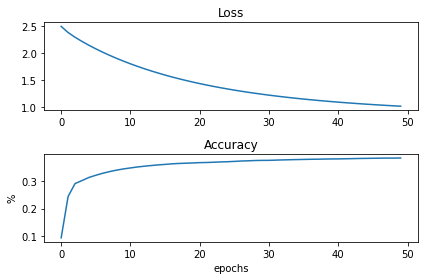

In [9]:
print('final loss : ',loss)
print('final accuracy : ',accuracy*100)

fig,ax = plt.subplots(2,1)
ax[0].plot(reg,loss_history)
ax[1].plot(reg,train_acc_history)
ax[0].set_title('Loss')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('%')
fig.tight_layout()
plt.show()

Display weights as images

testing the accuracy

In [10]:
#Testing
h_testing = np.matmul(x_test,w1)+b1
y_pred_test  = sigmoid(h_testing)
loss_test = (1/N_te)*np.sum(np.square(y_test-y_pred_test))
y_out_test = np.zeros_like(y_test)
y_out_test[np.arange(len(y_test)), y_pred_test.argmax(1)] = 1
    
comp_test = np.all(y_out_test==y_test,axis = 1)
    
accuracy = np.sum(comp_test)/N_te
print("Test data loss :",loss_test)
print("Test data accuracy :",accuracy*100)

Test data loss : 1.003417438865267
Test data accuracy : 38.269999999999996


## Task 2

In [86]:
def sigmoid(x):
    z = 1/(1 + np.exp(-x))
    return z
    
def sigmoid_derive(x):
    return x*(1-x)

In [87]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


K = len(np.unique(y_train)) # Classes
N_tr = x_train.shape[0]
N_te = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(N_tr,Din))
print("x_train: ", x_train.shape)
x_test = np.reshape(x_test,(N_te,Din))
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")



x_train:  (50000, 3072)


In [102]:
std=1e-5
Din = 3072
HL1_nodes  =200
HL2_nodes = 200
K = 10
w1 = std*np.random.randn(Din, HL1_nodes)
b1 = np.zeros(HL1_nodes)

w2 = std*np.random.randn(HL1_nodes, HL2_nodes)
b2 = np.zeros(HL2_nodes)

w3 = std*np.random.randn(HL2_nodes, K)
b3 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
print("w3:", w3.shape)
print("b3:", b3.shape)

w1: (3072, 200)
b1: (200,)
w2: (200, 200)
b2: (200,)
w3: (200, 10)
b3: (10,)


In [103]:
epochs = 2
lr = 0.1
lr_decay=0
reg = []
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(epochs):
    print('w1 :',w1[0:10][0:10])
    #print('w2 :',w2[0:10][0:10])
    # Forward propagration
    a1 = x_train
    #print('x_train :',x_train[0:10][0:10])
    h1 = np.matmul(a1,w1)+np.transpose(b1)
    a2 = sigmoid(h1)
    #print('a2 :',a2[0:10][0:10])
    h2 = np.matmul(a2,w2)+np.transpose(b2)
    a3 = sigmoid(h2)
    h3 = np.matmul(a3,w3)+np.transpose(b3)
    a4 = sigmoid(h3)

    y_pred = a4
    #print('y_out :',y_pred[0:10])
    #print('y_true :',y_train[0:10])

    loss = (1/N_tr)*np.sum(np.multiply(-y_train,np.log(y_pred)) - np.multiply(1-y_train,np.log(1-y_pred)))
    print("Epoch:",t," Loss:",loss)

    y_out = np.zeros_like(y_train)
    y_out[np.arange(len(y_train)), y_pred.argmax(1)] = 1
    
    comp = np.all(y_out==y_train,axis = 1)
    
    accuracy = np.sum(comp)/N_tr
    #print(comp[0])
    #print("accuracy: ",accuracy*100)
    #print()

    # Back propogation
    batchsize = 500

    w1_grad = np.zeros_like(w1)
    w2_grad = np.zeros_like(w2)
    w3_grad = np.zeros_like(w3)
    for i in range(batchsize):
        error4 = y_pred[i]-y_train[i]
        delta4 = np.multiply(error4,np.multiply(a4[i],1-a4[i]))
        error3 = np.matmul(delta4,np.transpose(w3))
        delta3 = np.multiply(error3,np.multiply(a3[i],1-a3[i]))
        error2 = np.matmul(delta3,np.transpose(w2))
        delta2 = np.multiply(error2,np.multiply(a2[i],1-a2[i]))

        delta4.reshape(len(delta4),1)
        delta3.reshape(len(delta3),1)
        delta2.reshape(len(delta2),1)

        w3_grad += np.dot(np.transpose(np.array([a3[i]])),np.array([delta4]))
        w2_grad += np.dot(np.transpose(np.array([a2[i]])),np.array([delta3]))
        w1_grad += np.dot(np.transpose(np.array([a1[i]])),np.array([delta2]))

    w3 = w3 - lr*w3_grad
    w2 = w2 - lr*w2_grad
    w1 = w1 - lr*w1_grad 

w1 : [[ 2.04087376e-05  9.25815892e-06 -4.14245056e-06 ... -1.42748889e-06
   1.89102655e-06 -1.12187082e-05]
 [-4.28195886e-07  1.54519486e-05  2.14968702e-05 ...  1.69618023e-05
   1.88219838e-06  2.40068463e-07]
 [ 1.05242316e-05 -8.06838615e-06 -8.02534756e-06 ... -1.19542902e-06
  -6.44194844e-06 -7.32336527e-06]
 ...
 [ 1.32764413e-05  1.97388579e-05 -1.94422266e-05 ... -1.84765669e-06
   1.42986863e-05  1.80954625e-05]
 [-1.54218494e-05  2.12492033e-05  2.36694206e-05 ...  5.16012525e-06
   5.01977909e-06 -8.80143572e-06]
 [ 2.57862963e-05 -1.69881842e-05 -9.16236449e-06 ...  1.35302862e-05
   2.87714820e-06  1.33569121e-05]]
Epoch: 0  Loss: 6.9316237485639824
w1 : [[ 2.04087184e-05  9.25816099e-06 -4.14240404e-06 ... -1.42747852e-06
   1.89093138e-06 -1.12187627e-05]
 [-4.28221387e-07  1.54519407e-05  2.14968980e-05 ...  1.69618015e-05
   1.88210030e-06  2.39998655e-07]
 [ 1.05241987e-05 -8.06840590e-06 -8.02530416e-06 ... -1.19542893e-06
  -6.44209135e-06 -7.32346969e-06]
 ...

## Task 3 - Stochastic Gradient Decend

In [39]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


K = len(np.unique(y_train)) # Classes
N_tr = x_train.shape[0]
N_te = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(N_tr,Din))
print("x_train: ", x_train.shape)
x_test = np.reshape(x_test,(N_te,Din))
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")



x_train:  (50000, 3072)


In [40]:
std=1e-5
Din = 3072
HL1_nodes  =200
HL2_nodes = 200
K = 10
w1 = std*np.random.randn(Din, HL1_nodes)
b1 = np.zeros(HL1_nodes)

w2 = std*np.random.randn(HL1_nodes, HL2_nodes)
b2 = np.zeros(HL2_nodes)

w3 = std*np.random.randn(HL2_nodes, K)
b3 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
print("w3:", w3.shape)
print("b3:", b3.shape)

w1: (3072, 200)
b1: (200,)
w2: (200, 200)
b2: (200,)
w3: (200, 10)
b3: (10,)


In [41]:
epochs = 10
lr = 0.01
lr_decay=0.0001
reg = []
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(epochs):
    indices = np.arange(N_tr)
    rng.shuffle(indices)
    # Forward propagration
    a1 = x_train
    h1 = np.matmul(a1,w1)+np.transpose(b1)
    a2 = sigmoid(h1)
    h2 = np.matmul(a2,w2)+np.transpose(b2)
    a3 = sigmoid(h2)
    h3 = np.matmul(a3,w3)+np.transpose(b3)
    a4 = sigmoid(h3)

    y_pred = a4

    y_out = np.zeros_like(y_train)
    y_out[np.arange(len(y_train)), y_pred.argmax(1)] = 1

    loss = (1/N_tr)*np.sum(np.multiply(-y_train,np.log(y_pred)) - np.multiply(1-y_train,np.log(1-y_pred)))
    print("Epoch:",t," Loss:",loss)

    y_out = np.zeros_like(y_train)
    y_out[np.arange(len(y_train)), y_pred.argmax(1)] = 1
        
    comp = np.all(y_out==y_train,axis = 1)
        
    accuracy = np.sum(comp)/N_tr

    # Back propogation
    batchsize = 500

    w1_grad = np.zeros_like(w1)
    w2_grad = np.zeros_like(w2)
    w3_grad = np.zeros_like(w3)
    for i in indices[:batchsize]:
        error4 = y_pred[i]-y_train[i]
        delta4 = np.multiply(error4,np.multiply(a4[i],1-a4[i]))
        error3 = np.matmul(delta4,np.transpose(w3))
        delta3 = np.multiply(error3,np.multiply(a3[i],1-a3[i]))
        error2 = np.matmul(delta3,np.transpose(w2))
        delta2 = np.multiply(error2,np.multiply(a2[i],1-a2[i]))

        delta4.reshape(len(delta4),1)
        delta3.reshape(len(delta3),1)
        delta2.reshape(len(delta2),1)

        w3_grad += np.dot(np.transpose(np.array([a3[i]])),np.array([delta4]))
        w2_grad += np.dot(np.transpose(np.array([a2[i]])),np.array([delta3]))
        w1_grad += np.dot(np.transpose(np.array([a1[i]])),np.array([delta2]))

    w3 = w3 - lr*w3_grad
    w2 = w2 - lr*w2_grad
    w1 = w1 - lr*w1_grad 

Epoch: 0  Loss: 6.931493403968982
Epoch: 1  Loss: 25.000172970707577
Epoch: 2  Loss: 25.000172966252254
Epoch: 3  Loss: 25.000172961629886
Epoch: 4  Loss: 25.000172956819565
Epoch: 5  Loss: 25.000172951981433
Epoch: 6  Loss: 25.000172947697603
Epoch: 7  Loss: 25.000172943309263
Epoch: 8  Loss: 25.000172938458427
Epoch: 9  Loss: 25.000172933996886
